## Credit Card Fraud Detection
#### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset Link
https://www.kaggle.com/mlg-ulb/creditcardfraud/data

![alt text](http://wesb.com/wp-content/uploads/2018/04/creditcardfraud1280.jpg)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df.shape

(284807, 31)

In [10]:
#For value counts of both the classes
x = df['Class'].value_counts()
print("Value Counts:")
print(x)
y = df.shape
fraudper = (x[1]/y[0])*100
print(fraudper,"% of fraud points only")

Value Counts:
0    284315
1       492
Name: Class, dtype: int64
0.172748563062 % of fraud points only


Extremely Unbalanced Dataset

Dataset has all numerical features of which amount and time is given rest all 28 features are anonymized Principal Components transformed usign PCA. The output class can be either 1(in case of fraud) and otherwise 0.


It seems the features are quite not related to each other as no points are dark orange and very few are light orange
 which means few slightly related

# T-SNE Plots

(284807, 30) (284807, 1)
TSNE done in 28037.535s.
(284807, 3)


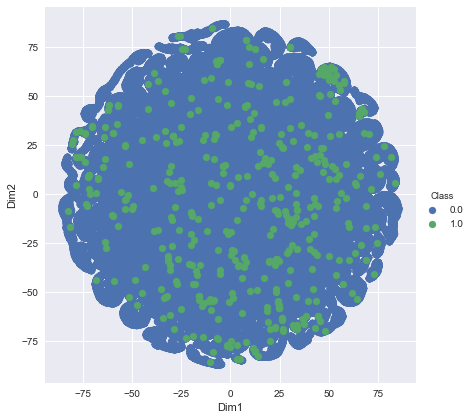

In [50]:
from sklearn.manifold import TSNE
from time import time


sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=40,n_iter=2000)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=40 with no normalization")
plt.show()


## Using Normalization on sample data

(50000, 30) (50000, 1)
TSNE done in 1854.504s.
(50000, 3)


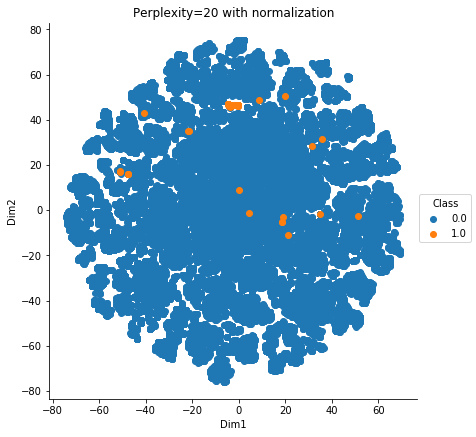

In [10]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = df.sample(50000)
# sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=20)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=20 with normalization")
plt.show()

(20000, 30) (20000, 1)
TSNE done in 748.679s.
(20000, 3)


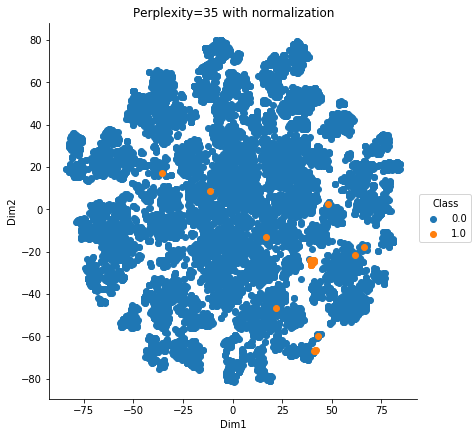

In [11]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = df.sample(20000)
# sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=35)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=35 with normalization")
plt.show()

(20000, 30) (20000, 1)
TSNE done in 852.140s.
(20000, 3)


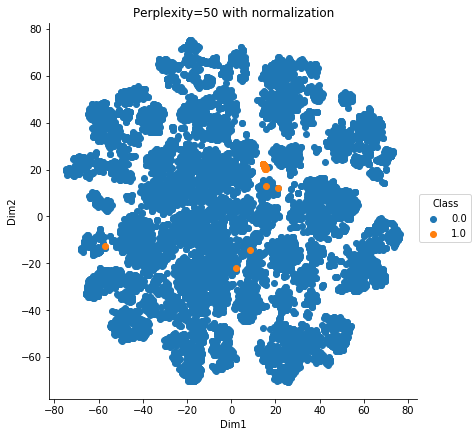

In [12]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = df.sample(20000)
# sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=50)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=50 with normalization")
plt.show()

(20000, 30) (20000, 1)
TSNE done in 681.636s.
(20000, 3)


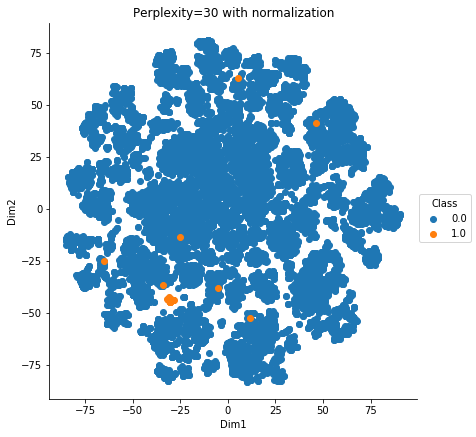

In [13]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = df.sample(20000)
# sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=30)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=30 with normalization")
plt.show()